# Data Analysis with Python
_T.J. Langford_  
_Wright Lab & YCRC_  
_October 27, 2021_  

# Overview

- Introduction to `numpy` and `matplotlib`
- Data processing and analysis with `numpy`
- Data visualization with `matplotlib`

# Tools and Requirements

- Language: Python 3.6
- Modules: `numpy`, `matplotlib`
- Jupyter notebook

# Comment: Python 2 versus 3
- Major modules dropped Python2 support in 2019
    - Including numpy, pandas, and matplotlib
- This tutorial uses Python3
- see https://python3statement.org for details


# Github Repository

- The materials from this tutorial are available on GitHub: https://github.com/WrightLaboratory/data_analysis
- Includes this Jupyter notebook and test data file

# Data Processing with `numpy`

In [1]:
import numpy as np

# What is Numpy?

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

[User Guide](https://docs.scipy.org/doc/numpy-1.16.1/)

## N-dimensional array objects

- Fundamental basis of numpy is the `array` object
- 1D array ~ vector
- 2D array ~ matrix  
- nD array (n > 2) ~ tensor

### Creating arrays

Arrays can be created in a variety of ways. The most common are either empty:

In [2]:
a = np.zeros(10)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

or you can create them from an existing `list`:

In [3]:
b = np.array([0,1,2,3,4,5,6,7,8,9])
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Array properties

Arrays have a few key properties:

- Data type (float, int, etc)
- Number of dimensions
- Shape 
- Size


In [4]:
print(a.dtype)
print(b.dtype)

float64
int64


In [5]:
a.shape

(10,)

In [6]:
c = np.array([[0,1,2,3],[4,5,6,7]])
c

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [7]:
c.shape

(2, 4)

### Array indexing and slicing

Arrays are indexed (starting at `0`) and we can slice them:

In [51]:
b

array([ 0,  1,  2, 10,  4,  5,  6,  7,  8,  9])

In [9]:
b[2:4]

array([2, 3])

In [10]:
b[0:-2]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [50]:
b[::3]

array([ 0, 10,  6,  9])

We also have "fancy indexing" for n-dimensional arrays:

In [12]:
c[:,2]

array([2, 6])

### Array manipulation

Arrays can be manipulated in-place, without creating a second copy: 

In [13]:
b[3] = 10
b

array([ 0,  1,  2, 10,  4,  5,  6,  7,  8,  9])

You can assign a range of values at once, either to a single value or from another array:

In [14]:
a[0:2] = 9
a[3:7] = b[0:4]

In [15]:
a

array([ 9.,  9.,  0.,  0.,  1.,  2., 10.,  0.,  0.,  0.])

The assignment isn't linked, so changing `b` now doesn't change `a`:

In [16]:
b[3] = 10
a

array([ 9.,  9.,  0.,  0.,  1.,  2., 10.,  0.,  0.,  0.])

### Array operations

We can also act on these arrays with specific operations:

- add, subtract, multiply, and divide by scalars or other arrays

In [17]:
np.multiply(a, b)

array([ 0.,  9.,  0.,  0.,  4., 10., 60.,  0.,  0.,  0.])

- extract statistics about the array (minimum, maximum, RMS, etc)

In [18]:
np.max(b)

10

In [19]:
np.mean(a)

3.1

In [53]:
np.std(a)

4.134005321718878

- sum array elements along an axis: 

In [54]:
np.sum(c, axis=0)

array([ 4,  6,  8, 10])

### Filter based on values 

Array elements can be selected based on their values (or values of different arrays)

In [55]:
print(a)

[ 9.  9.  0.  0.  1.  2. 10.  0.  0.  0.]


In [22]:
a > 5

array([ True,  True, False, False, False, False,  True, False, False,
       False])

This array of `True`/`False` values can then filter either `a` or other arrays:

In [23]:
a[a > 5]

array([ 9.,  9., 10.])

In [24]:
b[a > 5]

array([0, 1, 6])

We will use this to filter some real data later in the tutorial.

### Import and Export Arrays 

Numpy has two main ways of importing and exporting data:

- human readable text file with `np.savetxt`:

In [56]:
np.savetxt('test.txt', c, fmt='%f', delimiter=',', header='My favorite array')

In [26]:
cat test.txt

# My favorite array
0.000000,1.000000,2.000000,3.000000
4.000000,5.000000,6.000000,7.000000


- faster, more efficient binary data (`test.npy`):

In [57]:
np.save('test.npy', c)

## Random Number Generation with `numpy`

Numpy has a full suite of tools for generating random numbers. Very helpful for Monte Carlo simulations or toy data.

Here we will generate 100k random floats from a normal distribution with `mean = 2.0` and `sigma = 1.0`. 

In [64]:
r = np.random.normal(loc=2, scale=1, size=100000)
print(r[0:10])

[1.77753667 1.08406232 1.31416939 3.40909634 1.29646721 2.87113059
 3.83634964 2.81578506 1.63820832 1.42903053]


We can randomly select elements from an array:

In [30]:
np.random.choice(a, size=2)

array([ 0., 10.])

All the "heavy-lifting" is done in `C`, so `numpy`-based work can be _very_ fast.

### Random Number Example: Monte Carlo `pi`

We can perform a Monte Carlo-based simulation to calculate `pi` using two uniform random number generators. 

In [31]:
def mc_pi(num_trials):
    x = np.random.uniform(low=0.0, high=1.0, size=num_trials)
    y = np.random.uniform(low=0.0, high=1.0, size=num_trials)

    r = x**2 + y**2
    
    return len(r[r<1])*4/num_trials
    

In [77]:
for n in [10,100,1000,10000,100000,1000000,10000000]:
    print(f"{n}: {mc_pi(n)}")

10: 3.2
100: 3.12
1000: 3.124
10000: 3.1512
100000: 3.14388
1000000: 3.1408
10000000: 3.1415884


## Plotting with Matplotlib

In [33]:
import matplotlib.pyplot as plt

## Plotting with Matplotlib 

- Matplotlib is the back-bone of most python plotting and visualization
- It's super flexible and produces both interactive and publication-ready plots
- We'll touch on a few examples to demonstrate the versitility of this module

## Basic 2D Plot

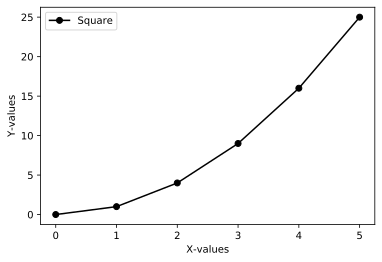

In [80]:
x = np.array([0,1,2,3,4,5])
y = np.power(x, 2)
plt.plot(x, y, marker='o', color='k', label='Square');
plt.xlabel('X-values');
plt.ylabel('Y-values');
plt.legend(loc=2);

## Scatter plot

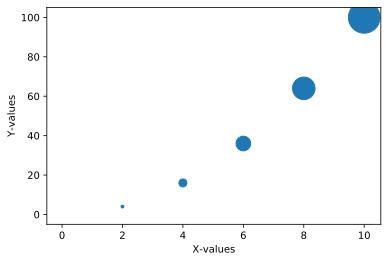

In [35]:
x = np.array([0,2,4,6,8,10])
y = np.power(x, 2)
r = np.power(x, 3)
plt.scatter(x, y, s=r)
plt.xlabel('X-values'); plt.ylabel('Y-values');


## Data Processing with `Numpy`

Now that we have a basic familiarity with `numpy`, we will attempt to process some low-level data produced by a PMT connected to a scintillator cell. 

A few key details about the data file:
- Recorded by a digitizer (similar to an oscilloscope, records triggered waveforms)
- 2-character unsigned binary data
- Each trigger window is 300 samples long
- Each trigger has a 6 long-word header containing information about the event:
    - Time-stamp, event number, channel ID, etc.

In [81]:
data_file = '../data/180822-EJ309-1700V-Cf252.dat'

In [82]:
f = open(data_file, 'r')

Channel: 1, Trigger: 23, TimeStamp: 13793235


Text(0, 0.5, 'ADC')

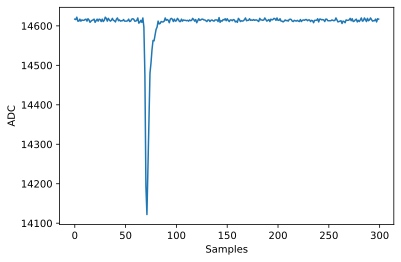

In [106]:
header = np.fromfile(f, dtype='I', count=4)
print(f"Channel: {header[1]}, Trigger: {header[2]}, TimeStamp: {header[3]}")

trace = np.fromfile(f, dtype='<H', count=300)
plt.plot(trace)
plt.xlabel('Samples');plt.ylabel('ADC')

### Analysis Function

In [39]:
def data_reader(file_name, num_ev=10000):
    header_size = 4
    window_size = 300
    
    with open(file_name, 'r') as d:
        # define data structure
        dtype = [('time_stamp','f4'), ('en','f4'), ('psd', 'f4')]
        data = np.zeros(shape=num_ev, dtype=dtype)
        
        for i in range(num_ev):
            header = np.fromfile(d, dtype='I', count=header_size)
            
            data['time_stamp'][i] = header[3]
            
            trace = np.fromfile(d, dtype='<H', count=window_size)
            
            # Average the first 30 samples to determine what "zero" is
            bl = np.average(trace[0:30])

            # Subtract off the baseline 
            trace = np.subtract(trace, bl)

            # find the minimum of the pulse
            peak_loc = np.argmin(trace)
            
            # Integrate the full pulse
            data['en'][i] = -np.sum(trace[peak_loc-30:peak_loc+100])
            
            # Integrate the tail of the pulse, then take the ratio to the full
            data['psd'][i] = -np.sum(trace[peak_loc+10:peak_loc+100])
            data['psd'][i] /= data['en'][i]
            
    return data

In [120]:
data = data_reader(data_file, num_ev=50000)

<ipython-input-39-a2efc4a279d1>:31: RuntimeWarning: divide by zero encountered in float_scalars
  data['psd'][i] /= data['en'][i]


In [41]:
from matplotlib.colors import LogNorm

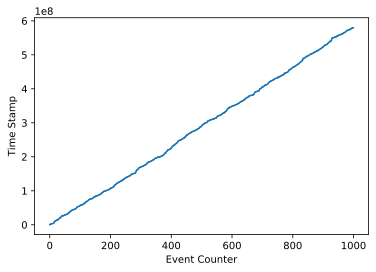

In [112]:
plt.plot(data['time_stamp'][0:1000], marker=',')
plt.xlabel('Event Counter');
plt.ylabel('Time Stamp');

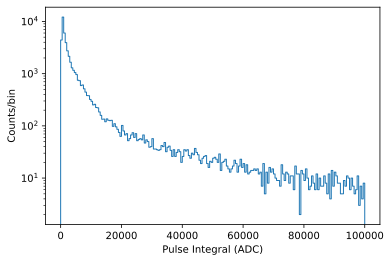

In [122]:
plt.hist(data['en'], bins=200, range=(0,100000), histtype='step');
plt.yscale('log');
plt.xlabel('Pulse Integral (ADC)');
plt.ylabel('Counts/bin');

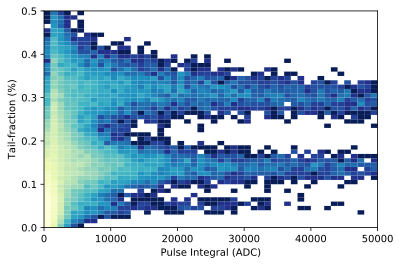

In [123]:
plt.hist2d(data['en'], data['psd'], bins=50, range=((0,50000),(0,0.5)), norm=LogNorm());
plt.xlabel('Pulse Integral (ADC)');
plt.ylabel('Tail-fraction (%)');

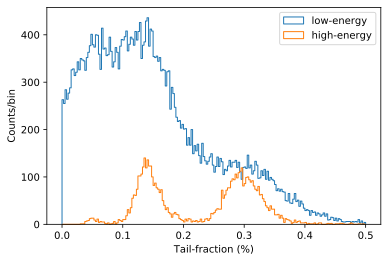

In [124]:
plt.hist(data['psd'][data['en']<15000], bins=200, range=(0,0.5), histtype='step', label='low-energy');

plt.hist(data['psd'][data['en']>15000], bins=200, range=(0,0.5), histtype='step', label='high-energy');

plt.xlabel('Tail-fraction (%)');
plt.ylabel('Counts/bin');plt.legend()

## Conclusions

- We've only scratched the surface of what python can do for data analysis. 
- Online Resources:
    - Numpy (https://numpy.org)
    - Matplotlib (https://matplotlib.org)
    - HEP-specific tools: SciKit-HEP (https://scikit-hep.org)
    
- Further reading (O'Reilly Books available through Yale Library):
    - [Data Analysis with Python by Wes McKinney](https://learning.oreilly.com/library/view/python-for-data/9781491957653/)
    - [High Performance Python](https://learning.oreilly.com/library/view/high-performance-python/9781492055013/)
